In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-coffee-price/coffee.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
rcParams['figure.figsize'] = 10,8

In [3]:
df = pd.read_csv('/kaggle/input/daily-coffee-price/coffee.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [4]:
df.shape

(5678, 7)

In [5]:
def generate_report(data):
    print(data.info())
    print(data.describe())

In [6]:
generate_report(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5678 entries, 0 to 5677
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5678 non-null   object 
 1   Open      5678 non-null   float64
 2   High      5678 non-null   float64
 3   Low       5678 non-null   float64
 4   Close     5678 non-null   float64
 5   Volume    5678 non-null   int64  
 6   Currency  5678 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 310.6+ KB
None
              Open         High          Low        Close        Volume
count  5678.000000  5678.000000  5678.000000  5678.000000   5678.000000
mean    126.112689   127.671250   124.650481   126.057091   8751.376365
std      49.738982    50.310743    49.039136    49.666867   9592.074980
min      41.500000    42.000000    41.500000    41.500000      0.000000
25%      98.500000    99.700000    97.400000    98.350000     61.000000
50%     119.900000   121.100000   118.5750

In [7]:
df.isnull().sum().sort_values(ascending=False)

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

<AxesSubplot:xlabel='Date'>

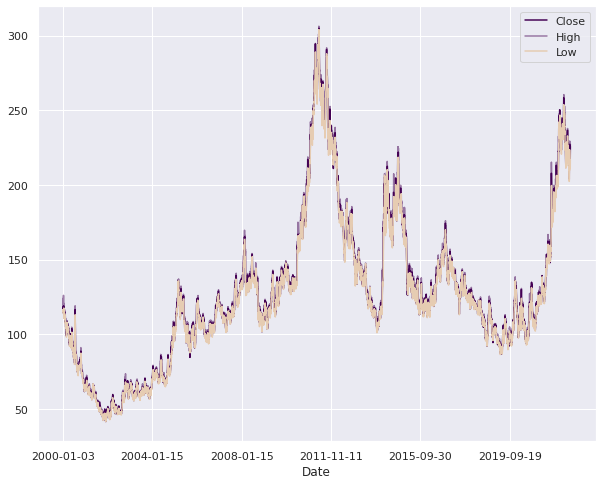

In [8]:
ax = plt.gca()
df.plot(x="Date", y="Close",cmap="viridis", ax = ax)
df.plot(x="Date", y="High",cmap="viridis", ax = ax, alpha=0.5)
df.plot(x="Date", y="Low", color="#e6ccb2", ax=ax)

<AxesSubplot:xlabel='Low', ylabel='Close'>

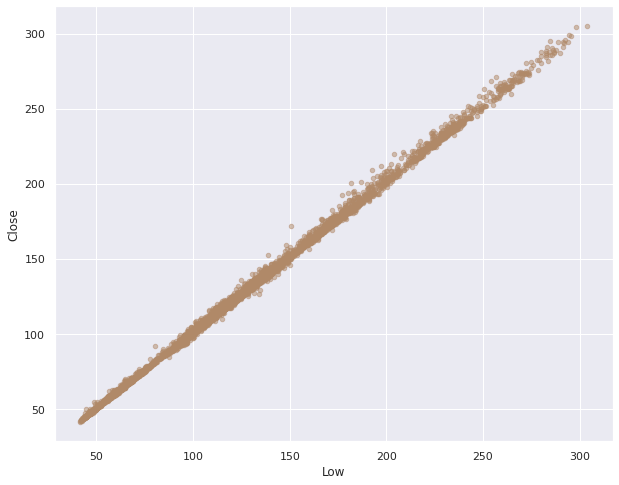

In [9]:
df.plot(x="Low", y="Close", kind="scatter", color="#b08968", alpha=0.5)

<AxesSubplot:xlabel='High'>

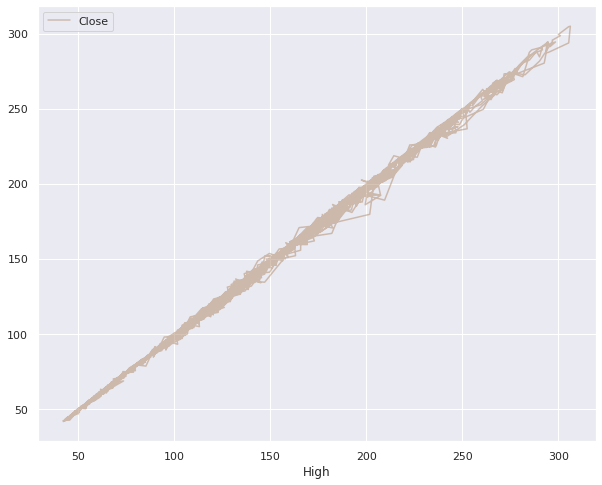

In [10]:
df.plot(x="High", y="Close", color="#b08968", alpha=0.5)

In [11]:
X = df[['Low']]
y = df[['Close']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)

(5110, 1)
(5110, 1)


In [14]:
def train_linReg(features, labels):
    lin_reg = LinearRegression()
    lin_reg.fit(features, labels)
    return lin_reg
    

In [15]:
lin_reg = train_linReg(X_train, y_train)

In [16]:
print(lin_reg.intercept_, lin_reg.coef_)

[-0.08666742] [[1.01206639]]


In [18]:
y_pred = lin_reg.predict(X_test)

In [17]:
lin_reg.score(X_test, y_test)

0.9988004651582867

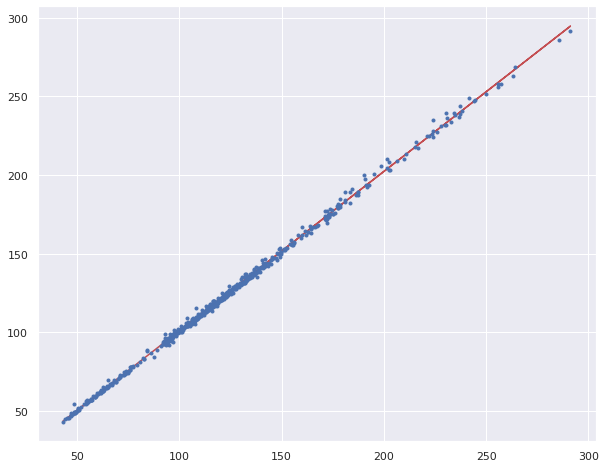

In [20]:
plt.plot(X_test, y_pred, "r-")
plt.plot(X_test, y_test, "b.")

plt.show()